# Variational Autoencoder - Dimensions of z - 32 dim
___
* see training - loss etc
* compare x and x_dach
* z = 32 dim
* record: noframeskip

In [27]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display
import json
from scipy.stats import norm
import statistics

In [2]:
from pathlib import Path
path = str(Path(os.getcwd()).parent)

import sys
sys.path.insert(0,path)

from breakout.vae.vae import ConvVAE

In [14]:
path = '/home/dakaun/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200423'
obs_path = '/home/dakaun/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200423/record_noframeskip'
LATENT_DIM = 32
vae_path = path +'/tf_vae'
trainparam_path = path + '/tf_vae/vae_train_param.json'
batch_size=1000

In [12]:
def load_raw_data_list(filelist):
    data_list = []
    action_list = []
    counter = 0
    for i in range(len(filelist)):
        filename = filelist[i]
        raw_data = np.load(os.path.join(obs_path, filename))
        data_list.append(raw_data['obs'])
        action_list.append(raw_data['action'])
        if ((i+1) % 1000 == 0):
            print("loading file", (i+1))
    return data_list, action_list

In [15]:
filelist = os.listdir(obs_path)[:100]
dataset, action_dataset = load_raw_data_list(filelist[0:10])
dataset[0].shape

(1000, 64, 64, 3)

### Sample z from normal distribution

In [6]:
vae = ConvVAE(z_size=LATENT_DIM,
              batch_size=16,
              learning_rate=0.0001,
              kl_tolerance=0.5,
              is_training=False,
              reuse=False,
              gpu_mode=True)
vae.load_json(os.path.join(vae_path,'vae.json'))

INFO:tensorflow:Model using gpu.


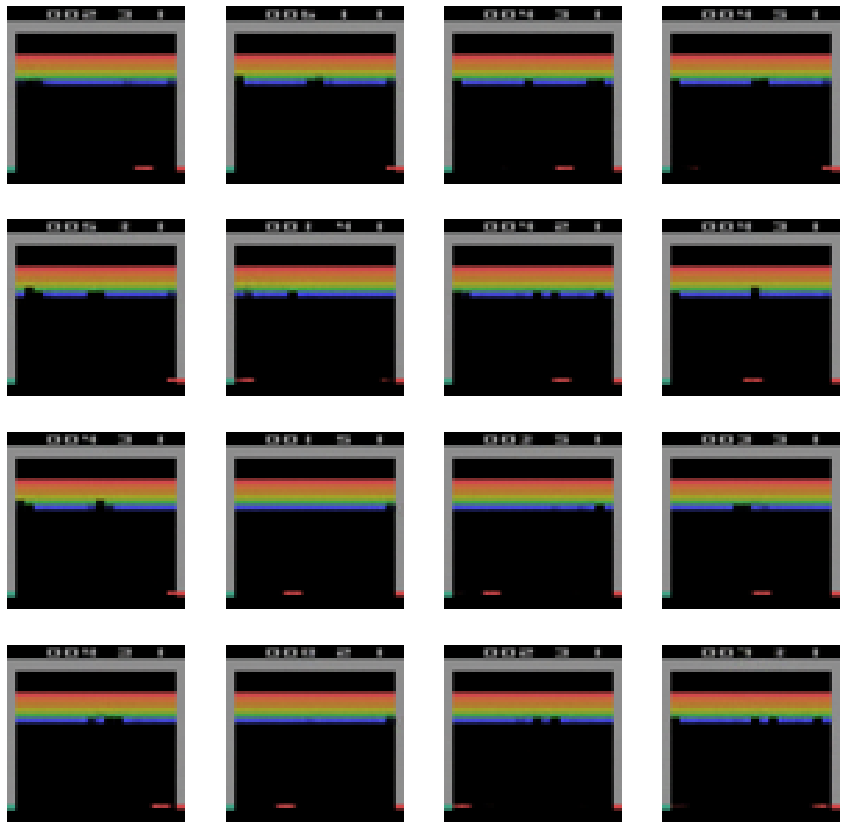

In [7]:
# z from normal distrib
num_examples_to_generate = 16
random_vec_for_generation = np.random.normal(size=(num_examples_to_generate, LATENT_DIM)) 
#tf.random_normal(shape=(num_examples_to_generate, LATENT_DIM))
z_dec = vae.decode(random_vec_for_generation)
fig = plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(z_dec[i, :, :, :])
    plt.axis('off')
plt.show()

In [29]:
random_vec_for_generation.shape

(16, 64)

In [30]:
len(np.where(abs(random_vec_for_generation[0])>0.1)[0])

62

only pos dim

In [ ]:
pos_random_vec_for_generation = np.maximum(0,random_vec_for_generation)

In [ ]:
pos_random_vec_for_generation

In [ ]:
ymax = max([max(item) for item in pos_random_vec_for_generation])
ymax

In [ ]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.ylim(1.0,ymax)
    plt.plot(pos_random_vec_for_generation[i].reshape(64))

In [ ]:
relevant_index = []

In [ ]:
obs = dataset[5]
mu, logvar = vae.encode_mu_logvar(obs)
z = mu + np.exp(logvar)
mu.shape
plt.title('Mu + Logvar')
plt.plot(mu[0], label='Mu')
plt.plot(logvar[0], label = 'Logvar')
plt.plot(z[0], label = 'Z')
plt.legend(loc='lower right')
plt.show()
info_var = np.where(abs(logvar[0])>0.1)
print(info_var[0])
print(len(info_var[0]))

### Invest z dim, first 200 dim, last 200 dim

In [17]:
vae = ConvVAE(z_size=LATENT_DIM,
              batch_size=batch_size,
              learning_rate=0.0001,
              kl_tolerance=0.5,
              is_training=False,
              reuse=False,
              gpu_mode=True)
vae.load_json(os.path.join(vae_path,'vae.json'))

obs = dataset[5]
z = vae.encode(obs) 
z_dec = vae.decode(z)

INFO:tensorflow:Model using gpu.


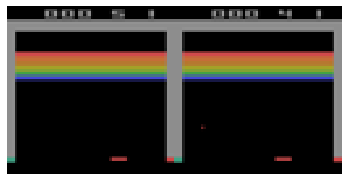

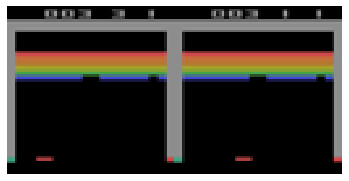

In [29]:
obs0200 = np.concatenate([obs[0],obs[200]], axis=1)
plt.imshow((obs0200).astype(np.float))
plt.axis('off')
plt.show()

obs_200 = np.concatenate([obs[800],obs[999]], axis=1)
plt.imshow((obs_200).astype(np.float))
plt.axis('off')
plt.show()

In [30]:
z_test = vae.encode(obs)
z_test_dec = vae.decode(z_test)
z_test.shape

(1000, 32)

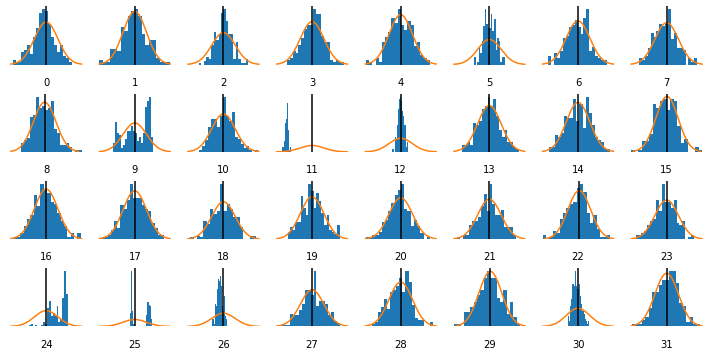

In [34]:
z_testpart1 = z_test[:200,]

x = np.linspace(-3, 3, 300)

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.hist(z_testpart1[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))
    ax.axvline(0, c="black")
plt.tight_layout()
plt.show()

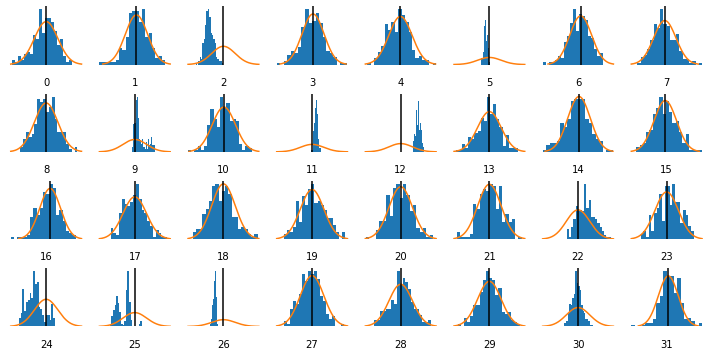

In [35]:
z_testpart_1 = z_test[-200:,]

x = np.linspace(-3, 3, 300)

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.hist(z_testpart_1[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))
    ax.axvline(0, c="black")
plt.tight_layout()
plt.show()

### Invest z dim - kleiner Unterschied in Frames - Leben verloren

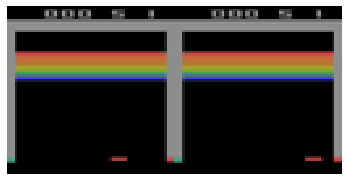

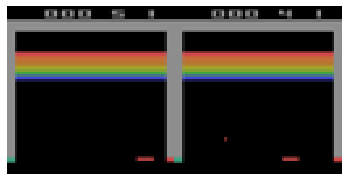

In [84]:
obs090 = np.concatenate([obs[0],obs[90]], axis=1)
plt.imshow((obs090).astype(np.float))
plt.axis('off')
plt.show()

obs95185 = np.concatenate([obs[95],obs[185]], axis=1)
plt.imshow((obs95185).astype(np.float))
plt.axis('off')
plt.show()

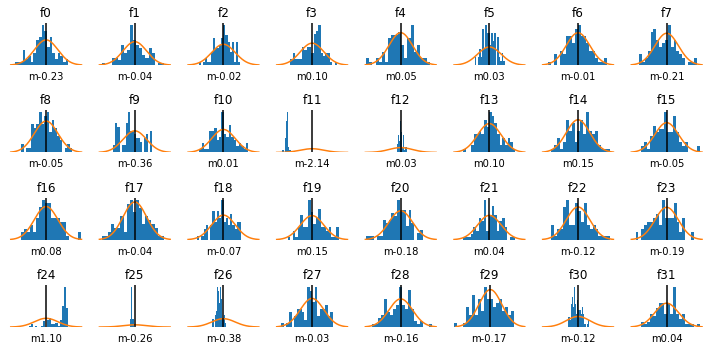

In [43]:
z_testpart1 = z_test[:90,]

x = np.linspace(-3, 3, 300)

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.hist(z_testpart1[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.set_title('f' + str(i))
    ax.text(0.5, -0.35, ('m{:.2f}'.format(statistics.mean(z_testpart1[:,i]))), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))
    ax.axvline(0, c="black")
plt.tight_layout()
plt.show()

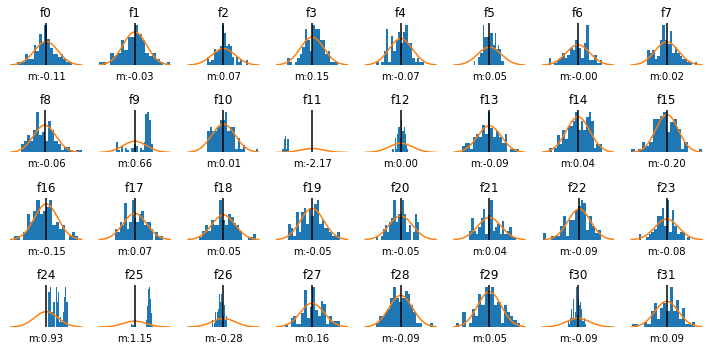

In [45]:
z_testpart2 = z_test[95:185,]

x = np.linspace(-3, 3, 300)

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.hist(z_testpart2[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.set_title('f' + str(i))
    ax.text(0.5, -0.35, ('m:{:.2f}'.format(statistics.mean(z_testpart2[:,i]))), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))
    ax.axvline(0, c="black")
plt.tight_layout()
plt.show()

In [46]:
print(min(z_testpart1[:,25]))
print(max(z_testpart1[:,25]))
print(statistics.mean(z_testpart1[:,25]))
print('\n')
print(min(z_testpart2[:,25]))
print(max(z_testpart2[:,25]))
print(statistics.mean(z_testpart2[:,25]))

-0.41658622
-0.1016794
-0.25884625


-0.31223932
1.5694654
1.1478814


In [75]:
z_dim25part1 = []
for i, zs in enumerate(z_testpart1):
    if (zs[25]> -0.265 and zs[25]< -0.25):
        z_dim25part1.append(i)
print(len(z_dim25part1))
z_dim25part1[:10]

8


[8, 10, 19, 20, 40, 49, 75, 79]

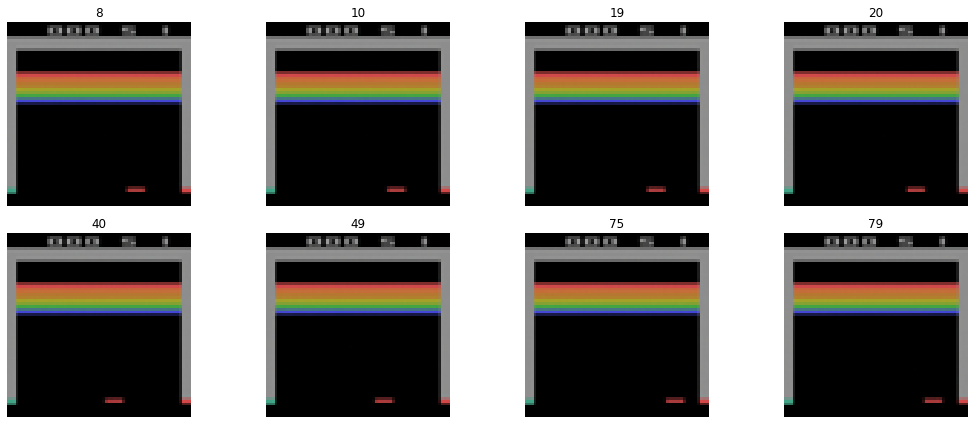

In [76]:
z_dim25part1[:10]

fig = plt.figure(figsize=(15,6))
for i in range(8):
    plt.subplot(2,4, i+1)
    plt.imshow(z_test_dec[z_dim25part1[i]])
    plt.title(f'{z_dim25part1[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [82]:
z_dim25part2 = []
for i, zs in enumerate(z_testpart2):
    if (zs[25]> 1.135 and zs[25]< 1.16):
        z_dim25part2.append(i)
print(len(z_dim25part2))
z_dim25part2[:10]

9


[6, 35, 37, 44, 57, 64, 82, 84, 86]

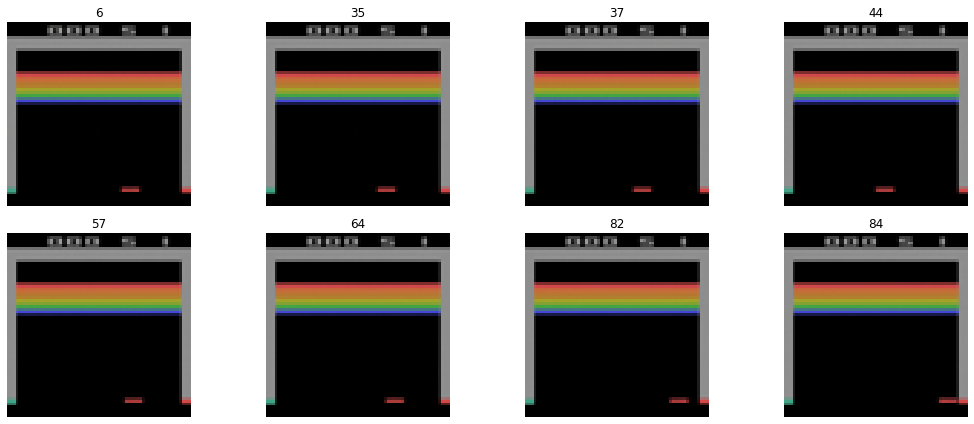

In [83]:
z_dim25part2[:10]

fig = plt.figure(figsize=(15,6))
for i in range(8):
    plt.subplot(2,4, i+1)
    plt.imshow(z_test_dec[z_dim25part2[i]])
    plt.title(f'{z_dim25part2[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# PCA